점수 : 

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Q1. df에서 mathematics 점수의 평균값, 중앙값, 최빈값, 분산, 표준편차, 범위, IQR을 구하세요.

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('./data/ch2_scores_em.csv',
                 index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [9]:
print(df.mean())

english        58.38
mathematics    78.88
dtype: float64


In [5]:
print(df.median())

english        57.5
mathematics    80.0
dtype: float64


In [6]:
print(df.mode())

   english  mathematics
0     57.0           77
1      NaN           82
2      NaN           84


In [7]:
print(df.var())

english        96.036327
mathematics    70.801633
dtype: float64


In [8]:
print(df.std())

english        9.799813
mathematics    8.414371
dtype: float64


In [15]:
df.max() - df.min()

english        42
mathematics    37
dtype: int64

In [13]:
IQR_eng = np.percentile(df.english, 75) - np.percentile(df.english, 25)
IQR_math = np.percentile(df.mathematics, 75) - np.percentile(df.mathematics, 25)

print(IQR_eng)
print(IQR_math)

11.0
8.0


Q2. df.english를 표준화한 후 배열로 변환하여 처음 5개 원소를 출력하세요.

In [17]:
score = df.english
type(score)

pandas.core.series.Series

In [25]:
z = (score - np.mean(score)) / np.std(score)
z = np.array(z)
z[:5]

array([-1.68843012,  1.09469645, -0.24532745, -1.79150888, -0.14224869])

Q3. score에 대하여 다음사항을 수행하세요.
- 상자그림으로 시각화하여 이상치 여부를 탐색
- 이상치 값 및 인덱스 출력
- 이상치 삭제
- 상자그림으로 시각화하여 이상치 제거 여부 재확인.

{'whiskers': [<matplotlib.lines.Line2D at 0x21708eae550>,
 'caps': [<matplotlib.lines.Line2D at 0x21708eaeaf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21708eae280>],
 'medians': [<matplotlib.lines.Line2D at 0x21708ec30d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21708ec33a0>],
 'means': []}

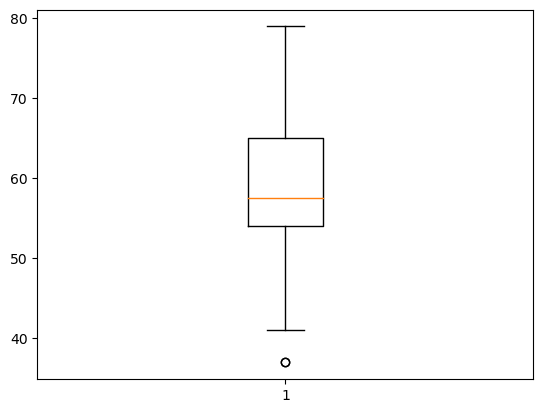

In [29]:
plt.boxplot(score)

In [40]:
Q1 = np.percentile(score, 25)
Q2 = np.percentile(score, 75)
score = pd.DataFrame(score)
abv = score[(score.english <= (Q1 - IQR_eng*1.5)) | score.english >= (Q2+IQR_eng*1.5)]
abv

,english
student number,


In [48]:
print(Q1, Q2, IQR_eng*1.5)
print(Q1 - IQR_eng*1.5, Q2+IQR_eng*1.5)
score

54.0 65.0 16.5
37.5 81.5


,english
student number,
1,42
2,69
3,56
4,41
5,57
6,48
7,65
8,49
9,65


Q4. 아래 scores_df에 대해서 아래사항을 수행하세요
- scores_df.english와 scores_df.mathematics에 대한 공분산을 소수점 2째자리까지 출력
- scores_df.english와 scores_df.mathematics에 대한 상관계수를 소수점 2째자리까지 출력
- 두개 변수의 상관관계와 회귀직선을 시각화(산점도, 회귀직선 포함, 박스플롯, 바이올린플롯을 2행 2열로 출력) 
- 두개 변수의 상관관계를 히트맵으로 시각화(칼러바 포함)
- 두개 변수에 대한 다차원 그래프(조인트 플롯)를 시각화

In [232]:
import numpy as np
import pandas as pd
df = pd.read_csv('./data/ch2_scores_em.csv',
                 index_col='student number')
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                          'mathematics':ma_scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
scores_df.head()

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76


In [233]:
scores_df["english_deviation"] = scores_df.english - scores_df.english.mean()
scores_df["mathematics_deviation"] = scores_df.mathematics - scores_df.mathematics.mean()
scores_df["product of deviation"] = scores_df["english_deviation"] * scores_df["mathematics_deviation"]
scores_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviation
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [234]:
round(np.cov(en_scores, ma_scores)[0,1] / (np.std(en_scores) * np.std(ma_scores)),2)

0.91

<AxesSubplot:xlabel='english', ylabel='mathematics'>

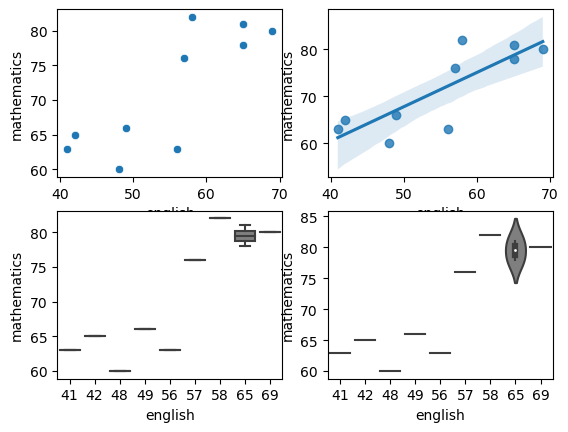

In [237]:
fig, axes = plt.subplots(nrows=2, ncols=2)

sns.scatterplot(data = scores_df, x='english', y="mathematics" , ax = axes[0,0])
sns.regplot(data = scores_df, x='english', y="mathematics", ax = axes[0,1])
sns.boxplot(data = scores_df, x='english', y="mathematics", ax = axes[1,0])
sns.violinplot(data = scores_df, x='english', y="mathematics", ax = axes[1,1])

<AxesSubplot:>

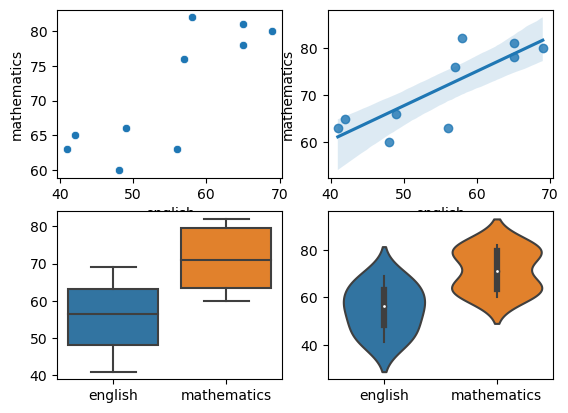

In [239]:
# A
fig, axes = plt.subplots(nrows=2, ncols=2)

sns.scatterplot(data = scores_df, x='english', y="mathematics" , ax = axes[0,0])
sns.regplot(data = scores_df, x='english', y="mathematics", ax = axes[0,1])
sns.boxplot(data = scores_df[["english","mathematics"]], ax = axes[1,0])
sns.violinplot(data = scores_df[["english","mathematics"]], ax = axes[1,1])

<AxesSubplot:>

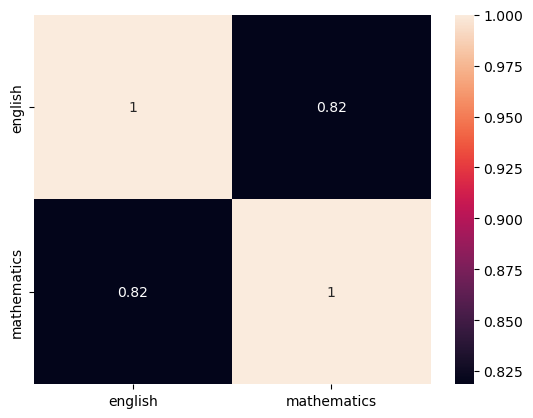

In [221]:
sns.heatmap(data = scores_df[["english","mathematics"]].corr(), annot = True)

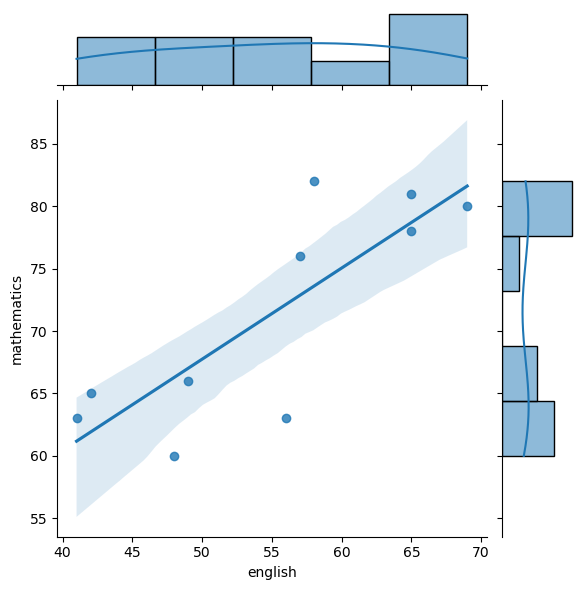

In [224]:
sns.jointplot(data = scores_df[["english","mathematics"]], x = "english", y = "mathematics", kind = "reg")

Q5. 아래 scores는 전교생의 시험점수이다. 무작위추출로 표본 크기가 20인 표본을 추출하여 표본평균을 계산하는 작업을 10000번 수행해서 그 결과를 히스토그램으로 그려 표본평균이 어떻게 분포되는지 시각화를 수행하세요.

In [65]:
import pandas as pd
import numpy as np
df = pd.read_csv('./data/ch4_scores400.csv')
df.head()
# scores = np.array(df['score'])
# scores[:10]

,score
0,76
1,55
2,80
3,80
4,74


<AxesSubplot:ylabel='Count'>

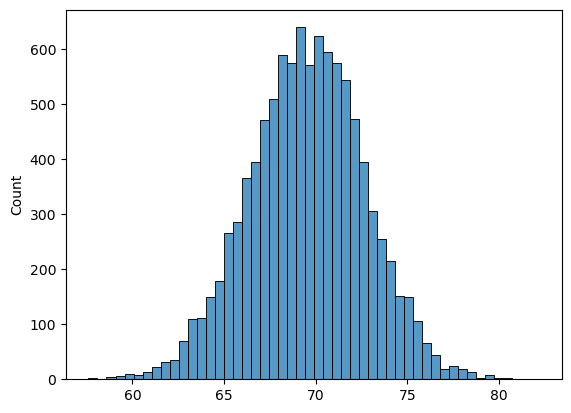

In [88]:
arr = np.array([])
for i in range(10000):
    arr = np.append(arr, df.sample(20).mean())
    
sns.histplot(arr, bins=50)

Q6. Bern(0.5)을 따르는 확률변수 X에 대하여 기댓값과 분산을 계산하세요. 

NameError: name 'Bin' is not defined

Q7. Bin(10,0.5)을 따르는 확률변수 X에 대하여 기댓값과 분산을 계산하세요.

Q8. Poi(2)을 따른 확률변수 X에 대하여 기댓값과 분산을 계산하세요.

Q9. 평균이 10, 표준편차가 3인 정규분포에서 다음 사항을 수행하세요.
- 확률밀도함수를 그래프로 표현하고 x값이 10일때의 확률을 구하세요.
- 확률이 0.1인 x값을 구하세요.

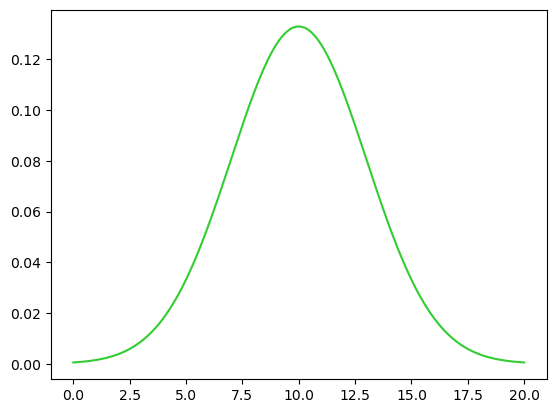

In [95]:
from scipy import stats
x_plot = np.arange(0,20.1,0.1)
plt.plot(x_plot,stats.norm.pdf(x = x_plot, loc = 10, scale = 3), color = "limegreen")

In [96]:
stats.norm.pdf(x = 10, loc = 10, scale = 3)

0.1329807601338109

In [241]:
stats.norm.ppf(0.1, loc = 10, scale = 3)

6.1553453033661985

Q10. 평균이 1, 표준편차가 2인 정규분포에서 다음을 수행하세요.
- 누적분포함수를 그래프로 표현하고 x분위가 8일때의 누적확률을 구하세요. 
- 누적 확률이 0.5일때의 x분위를 구하세요.

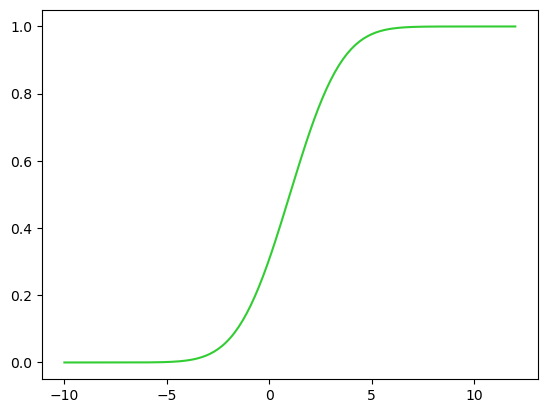

In [101]:
x_plot = np.arange(-10,12.1,0.1)
plt.plot(x_plot,stats.norm.cdf(x = x_plot, loc = 1, scale = 2), color = "limegreen")

In [102]:
stats.norm.cdf(x = 8, loc = 1, scale = 2)

0.9997673709209645

In [103]:
stats.norm.cdf(x = 1, loc = 1, scale = 2)

0.5

Q11. "dataset/5_2_fm.csv"을 df1으로 불러와서 다음사항을 수행하세요.
- df1을 df2 이름으로 복사한 후 df2의 species의 A, B를 C,D로 변경하세요.
- df의 length를 species가 C인 것은 2배로 d인 것은 3배로 변경하여 df1과 df2를 행방향으로 결합, df 생성 
- df를 species 칼럼을 기준으로 그룹별 평균과 표준편차를 산출

In [105]:
import pandas as pd
import numpy as np

df1 = pd.read_csv("./data/5_2_fm.csv")
df1

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10


In [107]:
df2 = df1.copy()
df2.replace(["A","B"],["C","D"], inplace = True)
df2

,species,length
0,C,2
1,C,3
2,C,4
3,D,6
4,D,8
5,D,10


In [111]:
df2.loc[df2["species"] == "C", "length"] *= 2
df2.loc[df2["species"] == "D", "length"] *= 3
df2

,species,length
0,C,4
1,C,6
2,C,8
3,D,18
4,D,24
5,D,30


In [117]:
df = pd.concat([df1, df2])
df.groupby("species").agg([np.mean, np.std])

length     
          mean  std
species            
A          3.0  1.0
B          8.0  2.0
C          6.0  2.0
D         24.0  6.0

Q12. "./dataset/5_2_shoes.csv" 을 데이터프레임으로 불러와서 아래작업을 수행하세요.
- 4행 3열을 복사 후 추가하여 8행 3열로 작성
- 피봇을 이용해서 교차분석표 작성(values='sales',aggfunc='sum', index= 'store', columns = 'color')
- 독립성 검정을 수행(보너스 문제)

In [121]:
import pandas as pd
shoes = pd.read_csv("data/5_2_shoes.csv")
shoes1=shoes.copy()
shoes1

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


In [122]:
shoes = pd.concat([shoes, shoes1])
shoes

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


In [124]:
cross = pd.pivot_table(data = shoes, values='sales',aggfunc='sum', index= 'store', columns = 'color')

In [125]:
from scipy.stats import chi2_contingency

stats.chi2_contingency(cross, correction = False)

(3.413537549407115,
 0.06466368573255789,
 1,
 array([[21.53191489, 22.46808511],
        [24.46808511, 25.53191489]]))

Q13. 'dataset/titanic3.csv'을 불러와서 pclass 와 sex 칼럼을 각각 인덱스, 칼럼으로 하고 values는 survived, 함수는 mean을 적용하여 pivot_table을 만든 후 히트맵으로 시각화 및 인사이트를 기술하세요

In [128]:
titanic = pd.read_csv('data/titanic3.csv')
titanic.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [129]:
cross = pd.pivot_table(data = titanic, values='survived',aggfunc='mean', index= 'pclass', columns = 'sex')

<AxesSubplot:xlabel='sex', ylabel='pclass'>

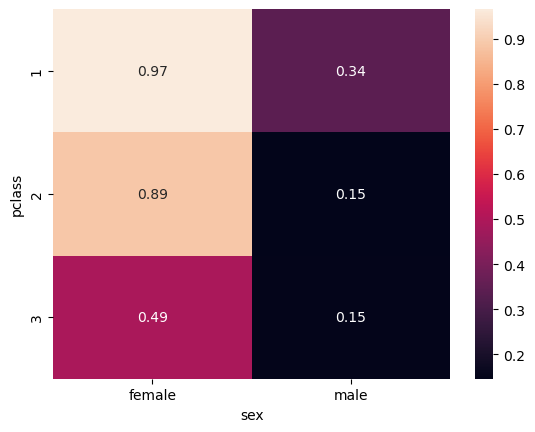

In [133]:
sns.heatmap(cross, annot = True)

Q14. 평균 4, 표준편차 0.8인 정규분포에서 샘플사이즈 10인 표본 10000개의 표본평균을 배열로 저장하고 10개를 출력하세요.(넘파이 zeros 함수 이용)

In [134]:
sample_size = 10
n_samples = 10000
mu = 4
sigma = 0.8

samples = np.zeros((n_samples, sample_size))

for i in range(n_samples):
    samples[i] = np.random.normal(mu, sigma, sample_size)

sample_means = samples.mean(axis=1)

print(sample_means[:10])

[4.34166988 4.00900253 4.02461527 3.82260877 4.06404918 3.94720003
 3.77460964 4.45150458 3.6930292  3.84885549]


Q15. Q14에서 구한 배열의 히스토그램을 시각화하세요.(확률밀도 포함)

<AxesSubplot:ylabel='Count'>

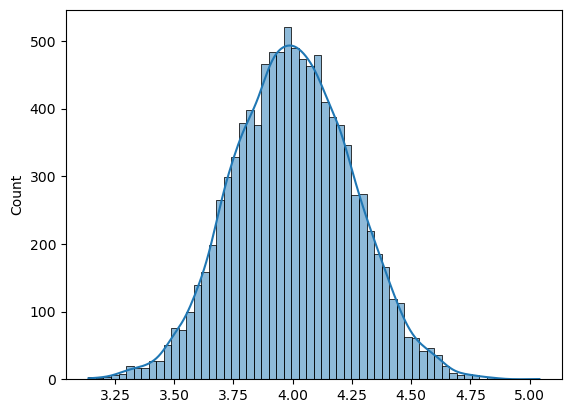

In [135]:
sns.histplot(sample_means, kde = True)

Q16. 크기가 10인 표본 데이터 [1.2, 1.8, 1.6, 1.4, 1.5, 1.7, 1.9, 1.3, 1.1, 1.4]로 다음을 수행하세요.
- 평균과 표준편차를 구하세요
- 신뢰수준을 95%로 설정하고 자유도를 계산하세요.
- 신뢰구간을 계산하고 결과를 출력하세요.

In [242]:
data = np.array([1.2, 1.8, 1.6, 1.4, 1.5, 1.7, 1.9, 1.3, 1.1, 1.4])
print(data.mean(), data.std())

1.49 0.2467792535850613


In [243]:
mu = data.mean()
se = data.std()
dof = len(data) - 1

In [244]:
# A
se = data.std()/np.sqrt(len(data))

In [245]:
interval = stats.t.interval(0.95, df=dof, loc=mu, scale=se)
interval

(1.3134647567021054, 1.6665352432978946)

Q17. 어떤 제품을 생산하는 공장에서 제품의 길이를 측정하여 표본평균과 표본표준편차를 계산했다고 가정한다. 이때 제품의 평균 길이를 추정하기 위하여 표본을 아래와 같이 추출하였다. 각각의 경우에 적합한 신뢰구간을 계산하세요.

표본 : [49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0]
- 95% 신뢰수준에서의 신뢰구간
- 99% 신뢰수준에서의 신뢰구간

In [246]:
data = np.array([49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0])

In [247]:
mu = data.mean()
se = data.std()
dof = len(data) - 1

In [248]:
# A
se = data.std()/np.sqrt(len(data))

In [249]:
interval = stats.t.interval(0.95, df=dof, loc=mu, scale=se)
interval

(49.80569021277854, 50.47430978722146)

In [250]:
interval = stats.t.interval(0.99, df=dof, loc=mu, scale=se)
interval

(49.65972752065198, 50.620272479348024)

Q18. 모집단의 표준편차는 0.5로 알려져 있다. 주어진 표본 데이터로 신뢰구간을 계산하세요.

표본 : [49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0]

In [149]:
data = np.array([49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0])

In [150]:
mu = data.mean()
dof = len(data) - 1

In [151]:
sample_std = np.std(data)
se = sample_std / np.sqrt(len(data))
z = stats.norm.ppf(0.975)
interval = (mu - z * se, mu + z * se)
interval

(49.85034941628928, 50.42965058371072)

Q19. 모집단의 표준편차는 알려져 있지 않다. 주어진 표본 데이터로 신뢰구간을 계산하세요.

표본 : [49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0]

In [152]:
data = np.array([49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0])

In [157]:
mu = data.mean()
dof = len(data) - 1
se = data.std()

In [ ]:
# A
se = data.std()/np.sqrt(len(data))

In [158]:
interval = stats.t.interval(0.95, df=dof, loc=mu, scale=se)
interval

(49.08281962829393, 51.19718037170607)

Q20. 자유도가 10이고 유의 수준이 0.05인 경우의 t-value를 구하세요.

In [159]:
dof = 10
alpha = 0.05
t_value = stats.t.ppf(alpha/2, df=dof)
t_value

-2.2281388519649385

Q21. 10000개의 표본으로 t 분포를 구성하여 자유도가 커짐에 따라 표준정규에 근사하는 현상을 그래프로 시각화하세요. 

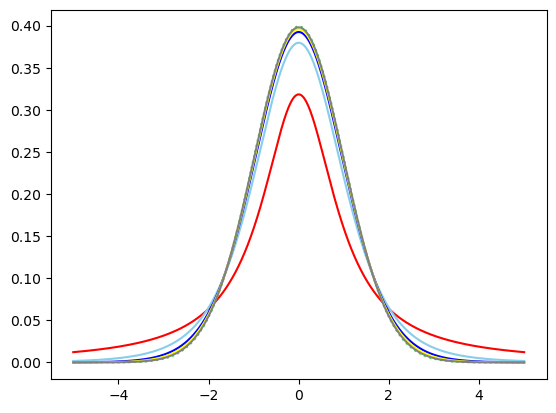

In [165]:
x = np.linspace(-5,5,10000)
plt.plot(x, stats.norm.pdf(x=x), color = "limegreen", linestyle = "dotted")
plt.plot(x, stats.t.pdf(x=x, df = 1), color = "red")
plt.plot(x, stats.t.pdf(x=x, df = 5), color = "skyblue")
plt.plot(x, stats.t.pdf(x=x, df = 15), color = "blue")
plt.plot(x, stats.t.pdf(x=x, df = 30), color = "yellow")
plt.plot(x, stats.t.pdf(x=x, df = 100), color = "gray")

Q22. "평균이 10, 표준편차가 0.8인 정규분포에서 추출한 샘플 사이즈가 커지면 불편분산은 모분산(0.64)에 가까워 진다"는 것을 그래프로 설명하세요.

<AxesSubplot:>

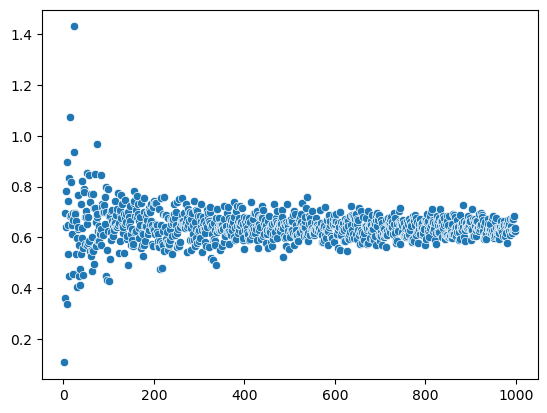

In [183]:
import warnings
warnings.filterwarnings("ignore")

arr = np.array([])
for i in range(1000):
    data = np.random.normal(loc=10, scale=0.8, size=i)
    var = np.var(data, ddof=1)
    arr = np.append(arr, var)
sns.scatterplot(arr)

Q23. 평균 4, 표준편차 0.8이 정규분포에서 확률이 0.5일때의 분위수 값을 계산하세요.

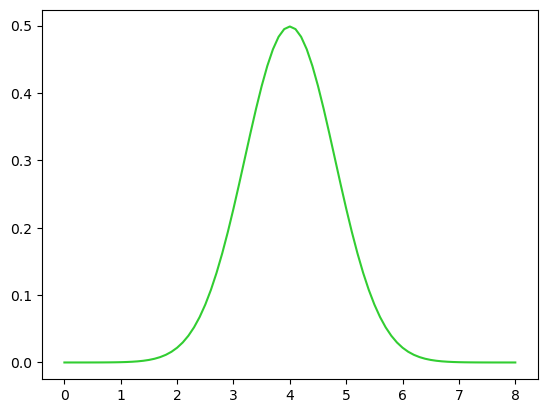

In [184]:
x_plot = np.arange(0,8.1,0.1)
plt.plot(x_plot,stats.norm.pdf(x = x_plot, loc = 4, scale = 0.8), color = "limegreen")

In [186]:
stats.norm.ppf(0.5, loc = 4, scale = 0.8)

4.0

Q24. 모집단의 평균과 표준편차가 각각 100, 10으로 알려져 있다. 표본의 크기가 100이고 표본평균과 모평균간 차이가 있는지 유의성 검정을 수행하세요

In [192]:
data = np.random.normal(100,10,100)
stats.ttest_1samp(data, 100)

Ttest_1sampResult(statistic=0.2576922179628973, pvalue=0.7971793438078092)

Q25. 모집단의 표준편차를 알지 못하는 상황하에서 표본의 크기가 20인 다음의 경우에 표본평균과 모평균간 차이가 있는지 유의성 검정을 수행하세요


In [193]:
import numpy as np
from scipy.stats import t

# 모집단의 평균을 지정합니다.
mu = 100

# 표본 데이터를 생성합니다.
sample_size = 20
sample = np.random.normal(mu, 10, sample_size)
sample[:10]

array([ 98.98709592, 103.52258803, 101.84561661,  95.15574726,
       102.72995968,  84.84770093,  97.85295177,  87.97824577,
       100.28966672,  99.04347108])

In [194]:
stats.ttest_1samp(sample, 100)

Ttest_1sampResult(statistic=0.006251116238965247, pvalue=0.9950775321618077)

Q26. 아래 주어진 데이터셋에서 약을 복용하기 전과 복용 후의 체온에 변화가 있는지에 대한 유의성 검정을 수행하세요.

In [197]:
import pandas as pd
pt_data = pd.read_csv('data/5_9_ptt.csv')
pt_data

,person,medicine,body_temperature
0,A,before,36.2
1,B,before,36.2
2,C,before,35.3
3,D,before,36.1
4,E,before,36.1
5,A,after,36.8
6,B,after,36.1
7,C,after,36.8
8,D,after,37.1
9,E,after,36.9


In [199]:
before = pt_data[pt_data["medicine"] == "before"]["body_temperature"]
after = pt_data[pt_data["medicine"] == "after"]["body_temperature"]

In [200]:
from scipy.stats import ttest_rel
t_statistic, p_value = ttest_rel(before, after)


if p_value < 0.05:
    print("약의 효과가 있다.")
else:
    print("약의 효과가 없다.")

약의 효과가 있다.


Q27.남자와 여자 두 그룹에 대해서 평균 키의 차이가 있는지에 대한 유의성 검정을 수행하세요.
- 남자의 키 데이터 : [172, 174, 176, 178, 180, 182, 184, 186, 188, 190]
- 여자의 키 데이터 : [156, 158, 160, 162, 164, 166, 168, 170, 172, 174]

In [201]:
male_heights = np.array([172, 174, 176, 178, 180, 182, 184, 186, 188, 190])
female_heights =np.array([156, 158, 160, 162, 164, 166, 168, 170, 172, 174])

In [202]:
t_statistic, p_value = stats.ttest_ind(male_heights, female_heights)
if p_value < 0.05:
    print("평균 차이가 있다.")
else:
    print("평균 차이가 없다.")

평균 차이가 있다.


Q28. 아래 데이터셋에서 color별 click빈도가 다른지에 대한 독립성 검정을 수행하세요.

In [203]:
click_data = pd.read_csv('data/5_10_cd.csv')
click_data

,color,click,freq
0,blue,click,20
1,blue,not,230
2,red,click,10
3,red,not,40


In [206]:
cross = pd.pivot_table(data = click_data, values = "freq", aggfunc = "sum", index = "color", columns = "click")
cross

click,click,not
color,,
blue,20,230
red,10,40


In [207]:
stats.chi2_contingency(cross)

(5.4,
 0.02013675155034633,
 1,
 array([[ 25., 225.],
        [  5.,  45.]]))

Q29."아래 표본의 평균은 10과 같다"라는 귀무가설에 대하여 "표본 평균은 10이 아니다"라는 대립가설이 유의미한지 검정을 수행하세요.

sample_data = np.array([10.8, 9.5, 11.2, 10.5, 11.3, 10.7, 10.9, 9.8, 11.0, 10.4])

In [251]:
sample_data = np.array([10.8, 9.5, 11.2, 10.5, 11.3, 10.7, 10.9, 9.8, 11.0, 10.4])

stats.ttest_1samp(sample_data, 10)

Ttest_1sampResult(statistic=3.3141516532462774, pvalue=0.009024007157468749)

In [256]:
sample_data.mean()

10.610000000000001

Q30. 아래 df 데이터셋에서 "무게의 평균이 130g보다 작지 않다."라는 귀무가설에 대한 유의성 검정을 수행하세요.(정규분포, 모분산 9) 

In [260]:
import pandas as pd
df = pd.read_csv('data/ch11_potato.csv')
print(df.head(),len(df))

       무게
0  122.02
1  131.73
2  130.60
3  131.82
4  132.05 14


In [268]:
z_value = (df.mean() - 130) / (3/(len(df)**0.5))

In [270]:
stats.norm.cdf(z_value,loc=0,scale=1)

array([0.02666132])

In [258]:
stats.ttest_1samp(df, 130, alternative='greater')

Ttest_1sampResult(statistic=array([-1.45519602]), pvalue=array([0.91533268]))

In [259]:
df.mean()

무게    128.450714
dtype: float64

In [271]:
len(df)

14